# Administrations

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read datasets
Read dataset `somministrazioni-vaccini-summary-latest.csv` and print basic info

In [57]:
directory = "../covid19-opendata-vaccini/dati/"
csv_vax_adms_summary = "somministrazioni-vaccini-summary-latest.csv"
vax_adms_summary = pd.read_csv(directory + csv_vax_adms_summary)
vax_adms_summary.head()

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,categoria_forze_armate,categoria_personale_scolastico,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-02-01,PIE,8639,3053,5586,6163,1402,1074,0,0,0,578,8061,ITC,ITC1,1,Piemonte
1,2020-12-31,LOM,713,300,413,656,57,0,0,0,0,713,0,ITC,ITC4,3,Lombardia
2,2021-02-01,UMB,1260,333,927,876,32,352,0,0,0,47,1213,ITI,ITI2,10,Umbria
3,2021-01-04,PAB,469,191,278,397,72,0,0,0,0,469,0,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
4,2021-01-30,CAL,2173,1147,1026,1974,199,0,0,0,0,358,1815,ITF,ITF6,18,Calabria


In [58]:
vax_adms_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   data_somministrazione                       1232 non-null   object
 1   area                                        1232 non-null   object
 2   totale                                      1232 non-null   int64 
 3   sesso_maschile                              1232 non-null   int64 
 4   sesso_femminile                             1232 non-null   int64 
 5   categoria_operatori_sanitari_sociosanitari  1232 non-null   int64 
 6   categoria_personale_non_sanitario           1232 non-null   int64 
 7   categoria_ospiti_rsa                        1232 non-null   int64 
 8   categoria_over80                            1232 non-null   int64 
 9   categoria_forze_armate                      1232 non-null   int64 
 10  categoria_personale_scol

Read dataset `anagrafica-vaccini-summary-latest.csv` and print basic info

In [59]:
csv_age_ranges = "anagrafica-vaccini-summary-latest.csv"
age_ranges = pd.read_csv(directory + csv_age_ranges)
age_ranges.head()

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,categoria_forze_armate,categoria_personale_scolastico,prima_dose,seconda_dose,ultimo_aggiornamento
0,16-19,4197,1879,2318,2519,1175,485,0,2,16,2822,1375,2021-02-27
1,20-29,384531,132143,252388,300925,67165,4495,0,5079,6867,243714,140817,2021-02-27
2,30-39,556218,216518,339700,419285,104491,6121,0,10714,15607,345081,211137,2021-02-27
3,40-49,711976,239442,472534,491271,156914,10067,0,19741,33983,447880,264096,2021-02-27
4,50-59,904474,303734,600740,621361,209540,18904,0,18799,35870,549991,354483,2021-02-27


In [60]:
age_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   fascia_anagrafica                           9 non-null      object
 1   totale                                      9 non-null      int64 
 2   sesso_maschile                              9 non-null      int64 
 3   sesso_femminile                             9 non-null      int64 
 4   categoria_operatori_sanitari_sociosanitari  9 non-null      int64 
 5   categoria_personale_non_sanitario           9 non-null      int64 
 6   categoria_ospiti_rsa                        9 non-null      int64 
 7   categoria_over80                            9 non-null      int64 
 8   categoria_forze_armate                      9 non-null      int64 
 9   categoria_personale_scolastico              9 non-null      int64 
 10  prima_dose                    

### Total number of vaccine administrations performed so far:

In [61]:
print("Total number of administrations performed so far: ", vax_adms_summary['totale'].sum())

Total number of administrations performed so far:  4074575


### Pie chart of age ranges

In [62]:
def slices_text(pct, allvals):
    """
    Function to create the text within each slice of the pie chart
    :param pct: percentage
    :param allvals: all the values, used to compute the absolute quantities
    """
    if pct < 3:
        return
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

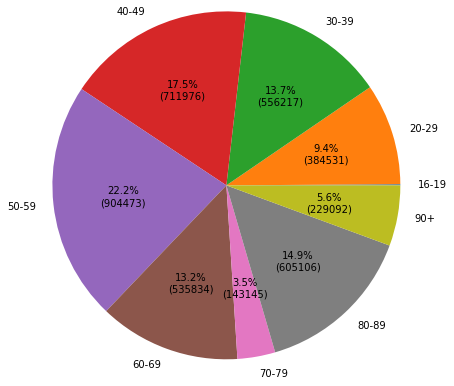

In [63]:
plt.pie(x=age_ranges['totale'], labels=age_ranges['fascia_anagrafica'],
        autopct=lambda pct: slices_text(pct, age_ranges['totale']), radius=2)
plt.show()
